In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
import seaborn as sns

In [2]:
#Lecture des fichiers csv

aliments = pd.read_csv("data/aliments.csv")
energie = pd.read_csv("data/energie.csv" , sep=";")
equipments = pd.read_csv("data/equipments.csv")

In [3]:

Emission_CO2_Aliments = aliments.groupby("main_type")["CO2"]

Moyenne_Aliments = Emission_CO2_Aliments.mean().sort_values(ascending = False)

Moyenne_Aliments

main_type
Viandes, oeufs, poissons                       12.820164
Produits sucrés                                 6.703472
Entrées et plats composés                       4.564264
Lait et produits laitiers                       4.311529
Matières grasses                                3.962143
Aides culinaires et ingrédients divers          3.143531
Produits céréaliers                             2.493327
Aliments infantiles                             2.404242
Boissons                                        2.221646
Glaces et sorbets                               1.775520
Fruits, légumes, légumineuses et oléagineux     1.386310
Name: CO2, dtype: float64

In [4]:


Emission_CO2_Equipments = equipments.groupby("english_name")["CO2"]

#Calcule de la moyenne

Moyenne_Equipments = Emission_CO2_Equipments.mean().sort_values(ascending = False)

#Calcule de la médiane

Median_Equipments = Emission_CO2_Equipments.median().sort_values(ascending= False)




/var/folders/g8/2_y_tg514lj2jkv3c_5z4kpm0000gp/T/ipykernel_26569/410592710.py:4: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(ax=axes[0], x=Moyenne_Aliments.index,
/var/folders/g8/2_y_tg514lj2jkv3c_5z4kpm0000gp/T/ipykernel_26569/410592710.py:8: UserWarning: set_ticklabels() should only be used with a fixed number of ticks, i.e. after set_ticks() or using a FixedLocator.
  axes[0].set_xticklabels(Moyenne_Aliments.index, rotation=30, ha="right", fontsize=10)


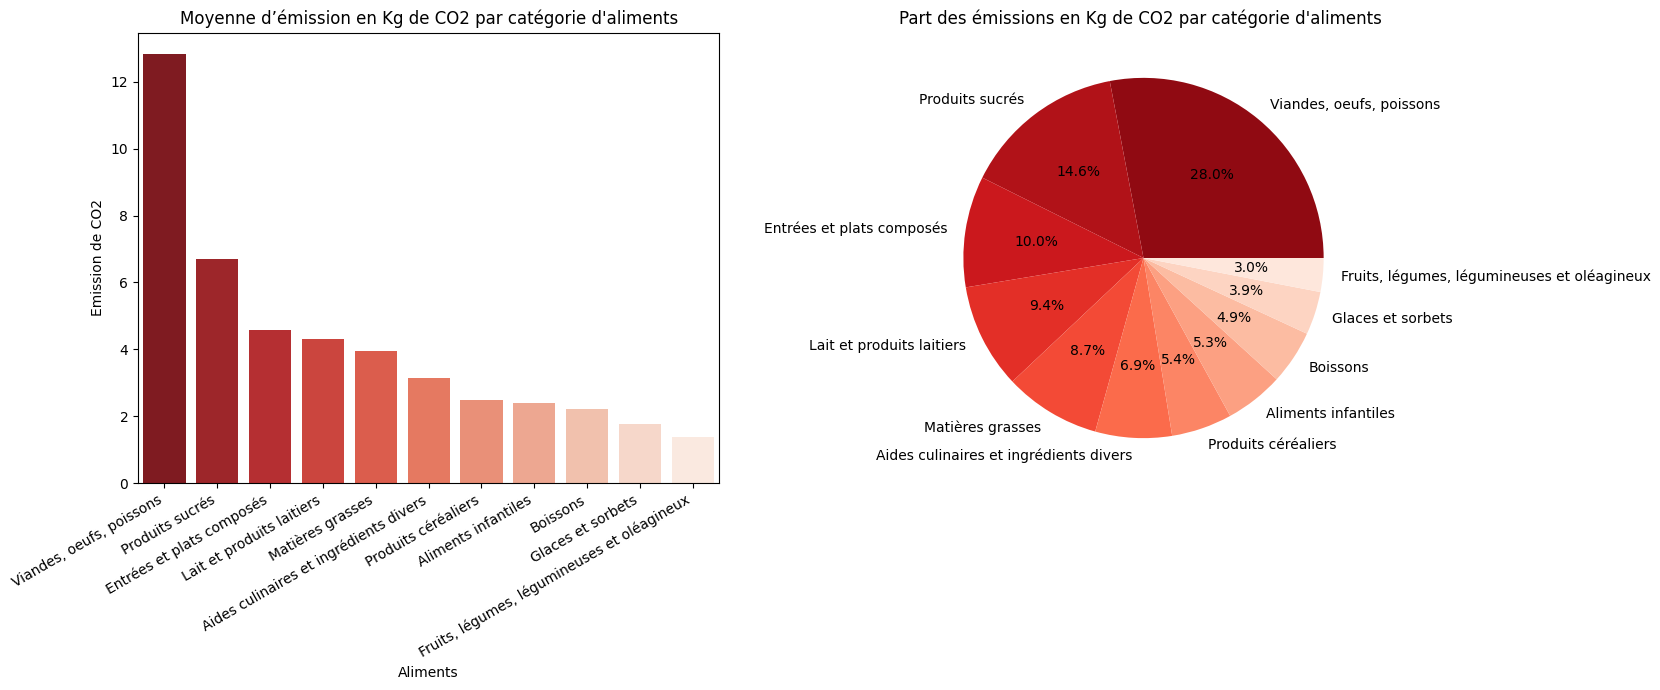

/var/folders/g8/2_y_tg514lj2jkv3c_5z4kpm0000gp/T/ipykernel_26569/410592710.py:33: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `y` variable to `hue` and set `legend=False` for the same effect.

  sns.boxplot(
/var/folders/g8/2_y_tg514lj2jkv3c_5z4kpm0000gp/T/ipykernel_26569/410592710.py:57: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  plt.tight_layout()
/Users/machabanskibenoit/Documents/Code/Python_M1/carbone_simulator/venv/lib/python3.13/site-packages/IPython/core/pylabtools.py:170: UserWarning: Glyph 8322 (\N{SUBSCRIPT TWO}) missing from font(s) Arial.
  fig.canvas.print_figure(bytes_io, **kw)


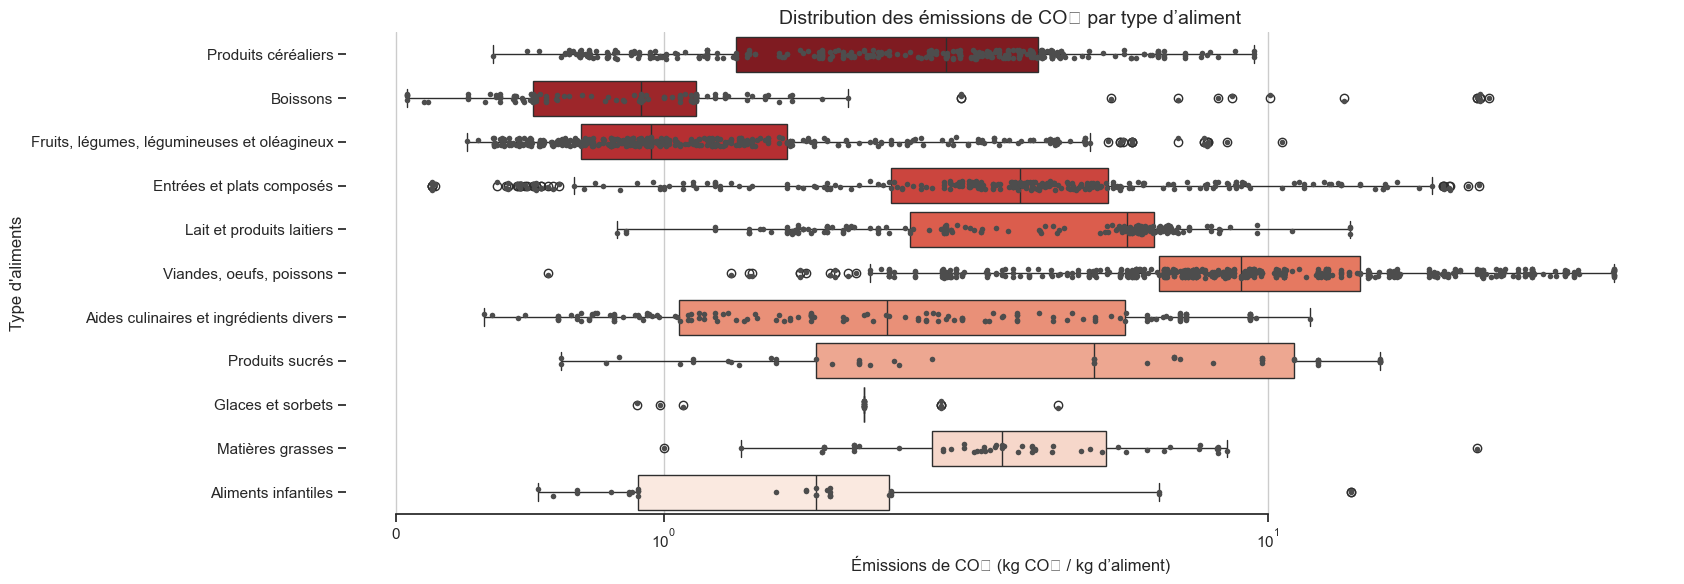

In [ ]:
fig, axes = plt.subplots(1, 2, figsize=(17, 7))#met les graphiques sur la même ligne

# Bar plot
sns.barplot(ax=axes[0], x=Moyenne_Aliments.index,
            y=Moyenne_Aliments.values,
            palette=sns.color_palette("Reds_r", n_colors=len(Moyenne_Aliments)))
axes[0].set_title("Moyenne d’émission en Kg de CO2 par catégorie d'aliments")
axes[0].set_xticklabels(Moyenne_Aliments.index, rotation=30, ha="right", fontsize=10)
axes[0].set_xlabel("Aliments")
axes[0].set_ylabel("Emission de CO2")

# Pie chart
axes[1].pie(Moyenne_Aliments.values,
            labels=Moyenne_Aliments.index,
            autopct='%1.1f%%',
            colors=sns.color_palette("Reds_r",
            len(Moyenne_Aliments)))
axes[1].set_title("Part des émissions en Kg de CO2 par catégorie d'aliments ")


plt.tight_layout()
plt.show()

sns.set_theme(style="ticks")

# Initialize the figure with a logarithmic x axis
fig, ax = plt.subplots(figsize=(17, 6))
ax.set_xscale("symlog")



# Plot the orbital period with horizontal boxes
sns.boxplot(
    data=aliments,
    x="CO2",
    y="main_type",
    palette="Reds_r"
)

# Add in points to show each observation
sns.stripplot(data= aliments,
               x="CO2",
               y="main_type",
               size=4,
               color=".3")

# Tweak the visual presentation
ax.xaxis.grid(True)
ax.set(
        xlabel = "CO2 ",
        ylabel="Aliments")
sns.despine(trim=True, left=True)

plt.title("Distribution des émissions de CO₂ par type d’aliment", fontsize=14)
plt.xlabel("Émissions de CO₂ (kg CO₂ / kg d’aliment)")
plt.ylabel("Type d'aliments")
plt.tight_layout()
plt.show()


/var/folders/g8/2_y_tg514lj2jkv3c_5z4kpm0000gp/T/ipykernel_26569/2899925582.py:2: FutureWarning: 

Passing `palette` without assigning `hue` is deprecated and will be removed in v0.14.0. Assign the `x` variable to `hue` and set `legend=False` for the same effect.

  sns.barplot(x=Moyenne_Equipments.index,


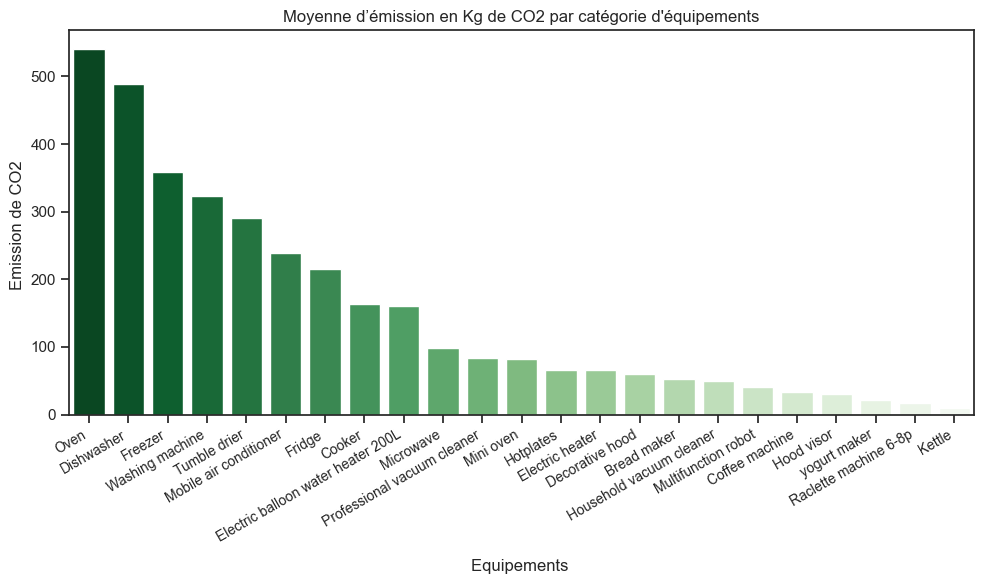

In [6]:
plt.figure(figsize=(10,6))
sns.barplot(x=Moyenne_Equipments.index,
            y=Moyenne_Equipments.values,
            palette = sns.color_palette("Greens_r",
            n_colors = len(Moyenne_Equipments))
            )
plt.title("Moyenne d’émission en Kg de CO2 par catégorie d'équipements")
plt.xticks(rotation=30, ha="right", fontsize=10)
plt.ylabel("Emission de CO2 ")
plt.xlabel("Equipements ",labelpad=10)
plt.tight_layout()
plt.show()



In [7]:
#Filtrage et statistiques pour les aliments

#On regroupe des catégories avec presque la même emission de CO2 tout en gardant les catégories principales
regroupement_aliments= {
                "Matières grasses" : "Matières grasses et ingrédients divers",
                "Aides culinaires et ingrédients divers" :"Matières grasses et ingrédients divers",
                "Boissons" : "Boissons et desserts",
                "Glaces et sorbets" : "Boissons et desserts"
                }
"""
En prenant les main_type on avait 11 catégories,
on regroupe les matières graces avec les aides culinaires et les ingrédients divers
ainsi que les boissons et glaces et sorbets car leur consommation est quasiment la même
"""
aliments["main_type"] = aliments["main_type"].replace(regroupement_aliments)
Emission_CO2_Aliments_filtered = aliments.groupby("main_type")["CO2"]
Moyenne_Aliments_filtered = Emission_CO2_Aliments_filtered.mean().sort_values(ascending= False)


In [8]:
#Filtrage pour les équipements
regroupement_equipments = {
                        "Oven": "Appareils de cuisson lourds",  # fours
                        "Cooker": "Appareils de cuisson lourds",
                        "Mini oven": "Appareils de cuisson légers",  # petits fours, micro-ondes, etc.
                        "Microwave": "Appareils de cuisson légers",
                        "Hotplates": "Appareils de cuisson légers",
                        "Raclette machine 6-8p": "Appareils de cuisson légers",
                        "Bread maker": "Appareils de cuisson légers",
                        "Dishwasher": "Appareils de lavage",
                        "Washing machine": "Appareils de lavage",
                        "Tumble drier": "Appareils de lavage",
                        "Freezer": "Appareils de froid",
                        "Fridge": "Appareils de froid",
                        "Electric heater": "Appareils de chauffage / eau chaude",
                        "Electric balloon water heater 200L": "Appareils de chauffage / eau chaude",
                        "Mobile air conditioner": "Appareils de climatisation",
                        "Decorative hood": "Appareils de ventilation / cuisine",
                        "Hood visor": "Appareils de ventilation / cuisine",
                        "Professional vacuum cleaner": "Appareils de nettoyage",
                        "Household vacuum cleaner": "Appareils de nettoyage",
                        "Coffee machine": "Petits appareils électroménagers",
                        "Kettle": "Petits appareils électroménagers",
                        "yogurt maker": "Petits appareils électroménagers",
                        "Multifunction robot": "Petits appareils électroménagers"
}

"""
Pour effectuer le filtrage, on regroupe les différents apparailes par rapport à leur consomations et leur lien.
Pour que la moyenne soit le moin faussé possible.

"""

equipments["english_name"] = equipments["english_name"].replace(regroupement_equipments)
Emission_CO2_Equipments_filtered = equipments.groupby("english_name")["CO2"]
Moyenne_Equipments_filtred= Emission_CO2_Equipments_filtered.mean().sort_values(ascending= False)


In [9]:
#Filtrage des energies
"""
On fait la moyenne sur les différentes catégories (Fiou,gaz, electricité...)
"""
mapping_energie= {
    "Fioul domestique" : "Fioul",
    "Gaz naturel - 2022" : "Gaz"
}

energie["french_name"] = energie["french_name"].replace(mapping_energie)

energie_filtered = energie.groupby("french_name")["CO2"].mean().sort_values(ascending=False)




In [10]:
#Transformer en data frame
Moyenne_Aliment_df = Moyenne_Aliments_filtered.reset_index()
Moyenne_Equipments_df = Moyenne_Equipments_filtred.reset_index()
moyenne_energie_df = energie_filtered.reset_index()

#On nomme les colommes des nouveaux fichiers csv
Moyenne_Aliment_df.columns = ["Main_type", "Moyenne_CO2"]
Moyenne_Equipments_df.columns = ["Categorie", "Moyenne_CO2"]
moyenne_energie_df.columns = ["Type", "CO2_Kwh"]


#Création du fichier csv
Moyenne_Aliment_df.to_csv("data/Aliment_filtered.csv", index = False)
Moyenne_Equipments_df.to_csv("data/Equipements_filtered.csv", index = False)
moyenne_energie_df.to_csv("data/energie_filtered.csv", index = False)



